In [3]:
from __future__ import division, print_function
from builtins import input

import numpy as np
import sporco as sp

from sporco.dictlrn import bpdndl
from sporco import util
# from sporco import array
from sporco import plot
import matplotlib.pyplot as plt
plot.config_notebook_plotting()
import pandas as pd

In [11]:
def creat_dic(data):
  image=[]
  for i in range(data.shape[0]):
      i=data[i][0:-1].astype("float32")/255
      i=i.reshape(20,20)
      image.append(i)
  
  image_tuple=tuple(image)
  
  S = util.extract_blocks(tuple(image_tuple), (8, 8))
  S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
  S -= np.mean(S, axis=0)

  np.random.seed(12345)
  D0 = np.random.randn(S.shape[0], 30)
  lmbda = 0.1
  opt = bpdndl.BPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 100,
                      'BPDN': {'rho': 10.0*lmbda + 0.1},
                      'CMOD': {'rho': S.shape[1] / 1e3}})
  d = bpdndl.BPDNDictLearn(D0, S, lmbda, opt)
  d.solve()
  print("BPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))
  return d,D0
def stat(d):
  its = d.getitstat()
  fig = plot.figure(figsize=(20, 5))
  plot.subplot(1, 3, 1)
  plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
  plot.subplot(1, 3, 2)
  plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
            its.DDlRsdl)).T, ptyp='semilogy', xlbl='Iterations',
            ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'],
            fig=fig)
  plot.subplot(1, 3, 3)
  plot.plot(np.vstack((its.XRho, its.DRho)).T, xlbl='Iterations',
            ylbl='Penalty Parameter', ptyp='semilogy',
            lgnd=['$\\rho_X$', '$\\rho_D$'], fig=fig)
  fig.show()

In [12]:
data=pd.read_csv("./train_data_area.csv").values
d_area,d0_area=creat_dic(data)

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  3.43e+06  2.93e+06  5.02e+06  5.51e+00  3.39e-01  3.33e+00  1.10e+00  5.23e-01  4.64e-01  9.08e+02
   1  1.40e+06  5.65e+05  8.34e+06  9.88e-01  1.98e-01  2.35e+00  1.10e+00  1.84e-01  7.25e-02  9.08e+02
   2  1.17e+06  3.11e+05  8.60e+06  6.78e-01  4.08e-02  4.66e-01  1.10e+00  1.21e-01  2.53e-02  9.08e+02
   3  1.13e+06  2.76e+05  8.55e+06  5.81e-01  2.13e-02  2.44e-01  1.10e+00  1.04e-01  1.59e-02  9.08e+02
   4  1.11e+06  2.66e+05  8.42e+06  5.59e-01  1.70e-02  1.98e-01  1.10e+00  9.85e-02  1.14e-02  9.08e+02
   5  1.09e+06  2.61e+05  8.31e+06  5.49e-01  1.44e-02  1.68e-01  1.10e+00  9.58e-02  8.76e-03  9.08e+02
   6  1.08e+06  2.57e+05  8.20e+06  5.43e-01  1.25e-02  1.45e-01  1.10e+00  9.41e-02  7.01e-03  9.08e+02
   7  1.07e+06  2.55e+05  8.12e+06  5.36e-01  1.11e-02 

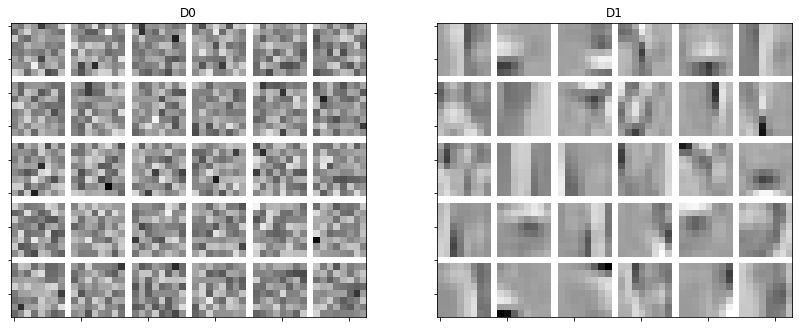

In [14]:
D1 = d_area.getdict().reshape((8, 8, d0_area.shape[1]))
D0 = d0_area.reshape(8, 8, d0_area.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

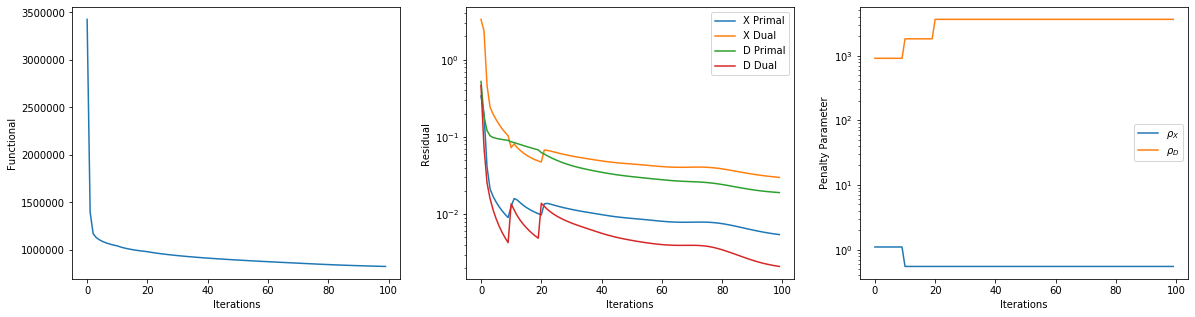

In [15]:
stat(d_area)

In [64]:
data2=pd.read_csv("/content/train_data_letter.csv").values
d_letter,d0_letter=creat_dic(data2)

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  8.67e+06  8.33e+06  3.34e+06  6.46e+00  3.34e-01  3.27e+00  1.10e+00  6.79e-01  2.75e-01  1.78e+03
   1  3.37e+06  2.42e+06  9.57e+06  8.26e-01  3.04e-01  5.77e+00  1.10e+00  2.78e-01  3.16e-02  1.78e+03
   2  2.93e+06  1.89e+06  1.04e+07  4.45e-01  6.75e-02  1.35e+00  1.10e+00  1.59e-01  1.30e-02  1.78e+03
   3  2.85e+06  1.77e+06  1.08e+07  3.22e-01  2.53e-02  5.18e-01  1.10e+00  1.21e-01  8.61e-03  1.78e+03
   4  2.81e+06  1.72e+06  1.09e+07  2.89e-01  1.28e-02  2.61e-01  1.10e+00  1.04e-01  6.31e-03  1.78e+03
   5  2.79e+06  1.70e+06  1.09e+07  2.75e-01  9.25e-03  1.89e-01  1.10e+00  9.54e-02  4.84e-03  1.78e+03
   6  2.77e+06  1.68e+06  1.09e+07  2.69e-01  7.39e-03  1.51e-01  1.10e+00  8.98e-02  3.82e-03  1.78e+03
   7  2.76e+06  1.67e+06  1.09e+07  2.65e-01  6.14e-03 

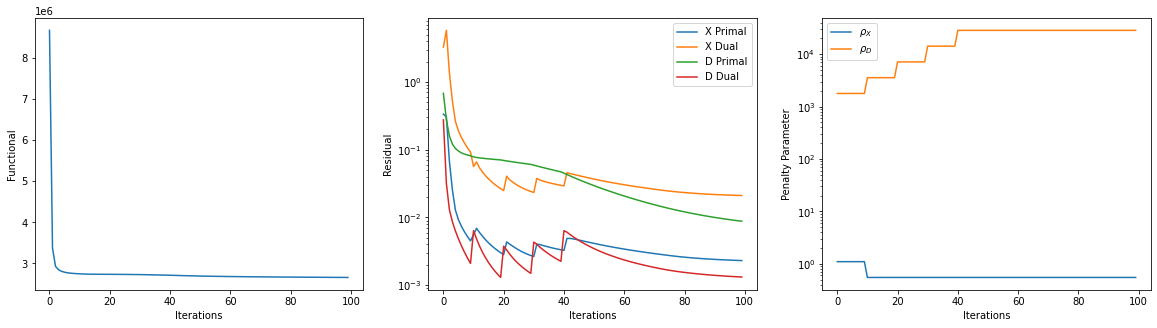

In [73]:
stat(d_letter)

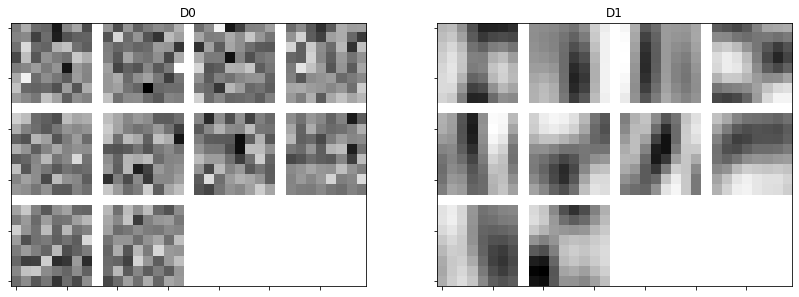

In [65]:
D1 = d_letter.getdict().reshape((8, 8, d0_letter.shape[1]))
D0 = d0_letter.reshape(8, 8, D0.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

In [66]:
data3=pd.read_csv("/content/train_data_province.csv").values
d_province,d0_province=creat_dic(data3)

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------
   0  1.72e+06  1.65e+06  6.58e+05  4.68e+00  3.28e-01  3.01e+00  1.10e+00  6.10e-01  3.40e-01  3.76e+02
   1  9.60e+05  7.96e+05  1.64e+06  8.38e-01  2.91e-01  4.49e+00  1.10e+00  2.57e-01  5.16e-02  3.76e+02
   2  8.86e+05  7.09e+05  1.77e+06  5.07e-01  7.07e-02  1.12e+00  1.10e+00  1.68e-01  2.48e-02  3.76e+02
   3  8.65e+05  6.81e+05  1.84e+06  3.95e-01  3.60e-02  5.88e-01  1.10e+00  1.40e-01  1.79e-02  3.76e+02
   4  8.53e+05  6.66e+05  1.87e+06  3.60e-01  2.49e-02  4.09e-01  1.10e+00  1.28e-01  1.39e-02  3.76e+02
   5  8.45e+05  6.56e+05  1.88e+06  3.43e-01  2.01e-02  3.32e-01  1.10e+00  1.20e-01  1.12e-02  3.76e+02
   6  8.39e+05  6.49e+05  1.90e+06  3.32e-01  1.68e-02  2.78e-01  1.10e+00  1.14e-01  9.21e-03  3.76e+02
   7  8.34e+05  6.44e+05  1.90e+06  3.23e-01  1.43e-02 

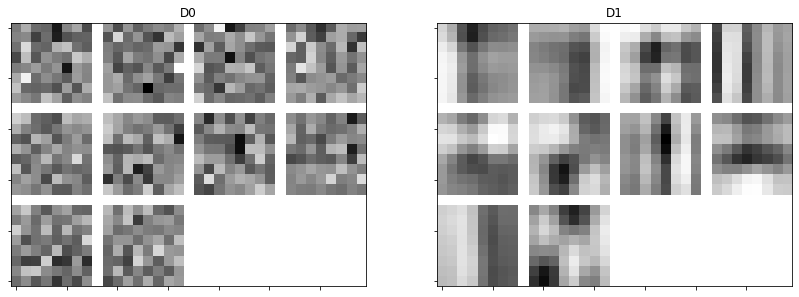

In [67]:
D1 = d_province.getdict().reshape((8, 8, d0_province.shape[1]))
D0 = d0_province.reshape(8, 8, D0.shape[-1])
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

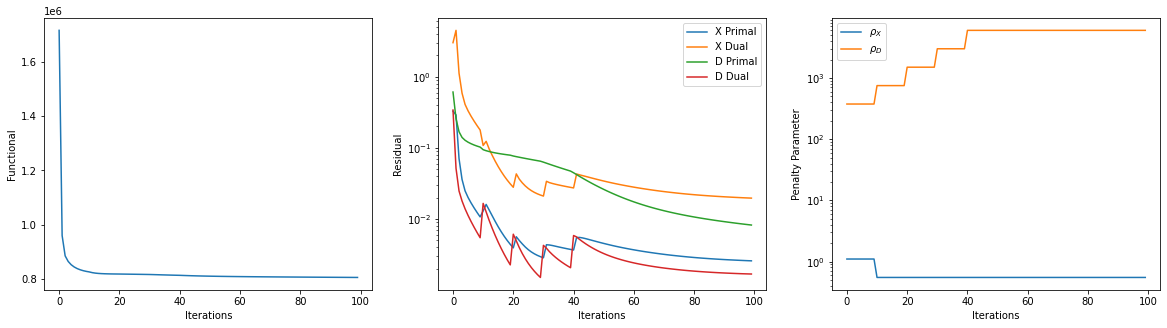

In [74]:
stat(d_province)